In [1]:
#Programar metodo de descenso pronunciado y metodo de Newton
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt 

# Funcion Rosenbrock
def rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100*(x[i+1]-x[i]**2)**2+(1-x[i])**2
    return suma

#funcion wood
def wood(x):
    return sum((
        100*(x[0]*x[0] - x[1])**2,
        (x[0]-1)**2,
        (x[2]-1)**2,
        90*(x[2]*x[2] - x[3])**2,
        10.1*((x[1]-1)**2 + (x[3]-1)**2),
        19.8*(x[1]-1)*(x[3]-1),
        ))

#falta una funcion

#Implementar gradiente y hessiano como diferencias finitas
#Gradiente 
def grad(x,xx, function, n, h):
    fprime = np.zeros(n)
    for i in range(n):
        x[i] = x[i]+h
        delante = function(x)
        x[i] = x[i]-2*h
        atras = function(x)
        fprime[i] = (delante-atras)/(2*h)
        x = np.copy(xx)
    return fprime

#Hessiano - desarrollado con diferencias finitas
def hessian(x, xx, function, n, h):
    hessian = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            x[i] = x[i]+h 
            x[j] = x[j]+h
            d = function(x)
            x[j] = x[j]-2*h
            a = function(x)
            #regresar al valor de x original
            x = np.copy(xx)

            x[i] = x[i]-h 
            x[j] = x[j]+h
            dd = function(x)
            x[j] = x[j]-2*h
            aa = function(x)
            #regresar al original
            x = np.copy(xx)
            
            #llenar matriz
            hessian[i][j] = (d-a-dd+aa)/(4*h*h)

    return hessian

#algoritmos 
#Stepeest descent algorithm
# with step size fixed 
def steepest_descent(function, x, alpha, n, h, TOL, iteraciones):
    fun = []
    norm = []
    
    for i in range(iteraciones):
        #print("sd i: ", i)
        g0 = grad(x, x, function, n, h)
        #print("g0: ", g0)
        #guardar la funcion y la norma
        fun.append(function(x))
        norm.append(np.linalg.norm(g0))
        
        x = x-alpha*g0
        if np.linalg.norm(g0) < TOL:
            return x, norm, fun,  i+1
    return x, norm, fun, iteraciones


def newton(function, x, n, h, TOL, iteraciones):
    fun = []
    norm = []
    #hacer un max de iteraciones o regresar valor
    for i in range(iteraciones):
        #print("n i: ", i)
        g0 = grad(x, x, function, n, h)
        hes = hessian(x, x, function, n, h)
        
        #guardar los valores de la funcion y de la norma para graficar 
        fun.append(function(x))
        norm.append(np.linalg.norm(g0))
        
        x = x - np.linalg.solve(hes, g0)
        if np.linalg.norm(g0) < TOL:
            return x, norm, fun,  i+1
    return x, norm, fun, iteraciones

In [ ]:
#Funciones de prueba
n = 100
x = np.zeros(n)
h = 0.000001
alpha = 0.002
TOL = 1e-4
max_iter = 100

xx, norma, f, itera = steepest_descent(ej3, x, alpha, n, h, TOL, max_iter)
norma

In [50]:
#Ultima funcion - no se sabe cual es el minimizador
sigma = 5
f = open("y.txt", "r") #leer la y
file = f.read()
file = file.split(',')
l = 1000.0 #lambda
 
n = 100
y = np.zeros(n)  
t = np.zeros(n)
for i in range (n):
    t[i] = ((2/(n-1))*(i-1)-1)
    
for i in range(1, n):
    #y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria
    y[i-1]=float(file[i])

def funcion(x):
    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)


In [51]:
x = np.zeros(n)
h = 0.000001
alpha = 0.0002
TOL = 1e-4
max_iter = 3000

xx, norma, f, itera = steepest_descent(funcion, x, alpha, n, h, TOL, max_iter)

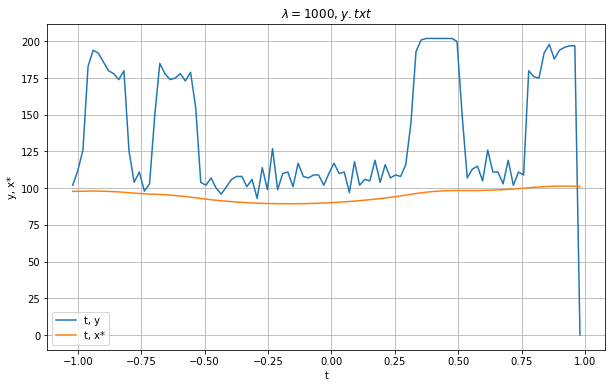

In [52]:
plt.figure(figsize = (10, 6))
plt.plot(t, y, label = 't, y')
plt.plot(t, xx, label = 't, x*')
plt.title(r'$\lambda = 1000, y.txt$')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('y, x*')
plt.savefig('funcion3_lambda_1000_y.png')